<a href="https://colab.research.google.com/github/Razbolt/Neural-Network/blob/main/Neural_Network_Math_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Install the MNIST and requirements

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
pip install python-mnist -- quiet

  Using cached python_mnist-0.7-py2.py3-none-any.whl (9.6 kB)
ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet
Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist

# Using keras libraries to take MNIST dataset
(X_train, y_train,), (X_test, y_test) = mnist.load_data()

## 1.1 Data preparation

Before procesing, we need to check the MNIST Data.

As we can see the X_train data is numbered from 0 to 255. In order to use them we need to normalize them as dividing to 255 each of the value.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We also need to check the shapes before feeding them into model.

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[1].shape

(28, 28)

In [8]:
# Since we see the shapes are (6000,28,28) we need to reshape them to feed our model

X_train = X_train.reshape(60000, 784) / 255.0

X_test = X_test.reshape(10000, 784) /255.0

print(X_train.shape , X_test.shape)

(60000, 784) (10000, 784)


In [9]:
print(X_train[0].shape)

(784,)


# 2.1 Build Neural Network

In [10]:
def init_params():

  #input layer's weigths
  W1 = np.random.uniform(-0.5, 0.5, (16,784))
  b1 = np.zeros((16,1))




  #Hidden layer's weight
  W2 = np.random.uniform(-0.5,0.5, (16,16))
  b2 = np.zeros((16,1))


  # Second Hidden layer' weight
  W3 = np.random.uniform(-0.5,0.5 ,(10,16))  # Weights are still to big
  b3 = np.zeros((10,1))


  return W1,b1,W2,b2,W3,b3



W1,b1,W2,b2,W3,b3 = init_params()


## 2.2 Build Activation functions and Forward Propagation

In [11]:
def ReLU(Z):

  return np.maximum(0,Z)


def softmax(Z): # CHECK IT !!!

  # for one examples is (np.exp(Z) / np.sum( np.exp(Z)))

    Z_exp = np.exp(Z - np.max(Z, axis=0))
    sum_Z_exp = np.sum(Z_exp, axis=0)
    softmax_output = Z_exp / sum_Z_exp

    return softmax_output

def sigmoid(Z):

  return 1 / 1+ np.exp(-Z)





def forward_prop(X,W1,b1,W2,b2,W3,b3,dropout = 0.0):
  #We are assuming to have 3 layered neural network 
  #D1 and D2 are mask layers for dropout 

  D1= None
  D2=None

  # if there is no dropout layer
  if (dropout) == 0.0:
    #Forward propagation with 3 layered neural network

    #Initialize  Z
    #Since X is shape as (6000,784) and our W1 is shape as (16,784) in order to dot product we need to take Transpose of X

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2


    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

 

  else: # If there is a droput layer, we are going to build mask for each layer
    #Forward propagation with 3 layered neural network 

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)
    
    #Create a mask for A1 as use probability of dropout from user
    D1 = np.random.rand(*A1.shape) > dropout #D1 is mask matrix that check the proability of dropout.
                                                          #If the probability is bigger than dropout, it will be 1 otherwise 0

    #Apply mask to A1
    A1 = A1 * D1
    #Normalize A1 to not to change expected value of A1 
    A1 = A1 / (1-dropout) # It scales A to not to change expected value of A1 as keeping  probability 
                          #keeeping probability means 1 - dropout probability

   
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    #Create a mask for second hidden layer as use probability of dropout from user
    D2 = np.random.rand( *A2.shape) > dropout
    A2 = A2 * D2
    A2 = A2 / (1-dropout)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

  return A1,A2,A3,D1,D2

A1,A2,A3,D1,D2 = forward_prop(X_train,W1,b1,W2,b2,W3,b3)

print(A3)






[[0.01500404 0.05363104 0.04667131 ... 0.0143118  0.02702216 0.01056243]
 [0.15155112 0.11413338 0.17878081 ... 0.27793059 0.09523603 0.29578992]
 [0.04291546 0.1660734  0.1049816  ... 0.05985431 0.10995541 0.06958951]
 ...
 [0.00810561 0.05842213 0.06729381 ... 0.02289159 0.0573601  0.02675677]
 [0.00293193 0.05473835 0.04720537 ... 0.007879   0.05444545 0.01719433]
 [0.48170369 0.12393148 0.1797272  ... 0.30842978 0.10535148 0.23981536]]


In [12]:
print(A1.shape[1])

60000


## 2.3 Back-Propagation with One-hot and derivative of activaton functions

In [13]:
def one_hot(Y): # CHECK IT !!
  num_classes = np.max(Y) + 1

  one_hot = np.zeros((Y.size,num_classes))
  one_hot[np.arange(Y.size), Y] = 1

  return one_hot.T

def derivative_ReLU(Z):
  #Do we need to check between 0-1 ?
  return Z > 0

#Focus on backpropagation !!! Check how its works ! 
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1, D2, dropout = 0.0): # CHECK IT !!!!

  m = Y.size
  Y = one_hot(Y)
  #if droput is not used

  if (dropout) == 0.0:
    
    #One hot encoded to see each labels in matrix as 1
    

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)

  else: #If droput is used

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    #Dropout mask for second hidden layer
    dA2 = dA2 * (D2)
    #dA2 = D2 / dropout

    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    #Dropout mask for first hidden layer
    dA1 = dA1 * (D1)
    #dA1 = D1 / dropout

    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)
    

  return dW1,dB1,dW2,dB2,dW3,dB3

## 2.4 Update the Gradient

In [14]:
learning_rate = 0.1
epochs =  200

def update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate):

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1,b1,W2,b2,W3,b3


## 2.5 Try in given epochs time to see the changes

In [15]:
def accuracy_score(A,Y):
    size = Y.size
    predict = np.argmax(A,0)

    correct = np.sum(predict == Y)

    accuracy = correct / size

    return accuracy


#print(predictions.max)
#print(y_train)
#print(np.sum(y_train == predictions))
#print(y_train.size)


In [16]:
dropout = 0.1
for epoch in range(epochs):
   # Forward propagation
   A1, A2, A3,D1,D2 = forward_prop(X_train, W1, b1, W2, b2, W3, b3,dropout=dropout)

   #Backward propagation
   dW1, db1, dW2, db2, dW3, db3 = backward_prop(X_train, y_train, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1,D2,dropout=dropout)

   #Updating gradients
   W1,b1,W2,b2,W3,b3 = update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate)



   if epoch % 100 == 0:
    acc =accuracy_score(A3,y_train)
    print(f'The accuracy in epoch {epoch} is {acc}')


The accuracy in epoch 0 is 0.10631666666666667
The accuracy in epoch 100 is 0.4109333333333333


# Full Connected Class Version 

  Missing parts

Only update rule

Find refferences for this code, maybe one hot, and test 


In [433]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_sizes,output_size,activation_function,dropout):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size] # Number of neurons in each layer
        self.activation_function = activation_function                 # Activation function to use
        self.dropout = dropout                                         # Dropout probability
        self.weights = []                                              # Weights for each layer
        self.biases = []                                               # Biases for each layer
        self.input_size = input_size                                   # Input size
        self.output_size = output_size                                 # Output size              
        self.hidden_sizes = hidden_sizes                               # Hidden layer sizes


        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.uniform(-0.5, 0.5, (self.layer_sizes[i+1], self.layer_sizes[i])))
            self.biases.append(np.zeros((self.layer_sizes[i+1], 1)))

            #Debug: Print shapes
            print(f"Weights in layer : {i}, Weights shape: {self.weights[i].shape}, Biases shape: {self.biases[i].shape}")
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
    

    
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
    
    
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true

        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
    
    
    def forward_prop(self,X):
        # Forward propagation
        A = X.T
        layer_outputs = {}
        D = {} # Dropout mask matrices

        #Loop over each layer in the network
        for layer in range(len(self.layer_sizes)-1):
            # Compute the linear output Z for the current layer
            Z = self.weights[layer].dot(A) + self.biases[layer]

            #Check for the if not the last layer, and apply the activation function
            if (layer != len(self.layer_sizes) - 2 ):
                A = self.activation(Z)
                #Check for dropout and apply it accordingly 
                if self.dropout > 0: #apply dropout

                    '''

                    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
                    https://www.youtube.com/watch?v=D8PJAL-MZv8
                    '''       

                    #Create a dropout mask matrix to be dropoutted neurons
                    D[layer] = np.random.rand(*A.shape) > self.dropout
                    #Apply the mask to A
                    A = A * D[layer]
                    #Normalize A to not to change expected value of A as keeping  probability
                    A = A / (1 - self.dropout)
                    
            #if there is no dropout
            else: #for the last layer use softmax activation function
                A = self.softmax(Z)
            layer_outputs[layer] = (A,Z)
            #Debuging: Print shapes
            #print(f"Forward Propagation, Layer: {layer}, A shape: {A.shape}, Z shape: {Z.shape}")
        
        return layer_outputs,D
    
    def backward_prop(self, X, Y, layer_outputs, D):

        m = X.shape[0]  # Number of training examples
        Y = self.one_hot(Y)  # One hot encode the labels
        gradients = {}  # Dictionary to store the gradients for each layer
        dZ = None 
        for layer in reversed(range(len(self.layer_sizes) - 1)): # Layers are backwardley calculate the gradients
            A, Z = layer_outputs[layer]                          # Get the layer's activations and linear outputs

            if layer == len(self.layer_sizes) - 2:  # Gradient for the last layer
                dZ = A - Y
                
            else:                                  # Gradient for the hidden layers
                dA = np.dot(self.weights[layer + 1].T, dZ)
                if self.dropout > 0:               # Apply dropout   
                    dA *= D[layer]
                dZ = dA * self.derivative_activation(Z)

            prev_A = layer_outputs[layer - 1][0] if layer != 0 else X.T     #If layer is not last one takes the previous layer's activation
                                                                            #If layers is last one takes the input X
            # Debugging: Print shapes
            #print(f" Backward_prop ,Layer: {layer}, prev_A shape: {prev_A.shape}, dZ.T shape: {dZ.T.shape}")

            #Calculate the gradients for each layer  and store them in gradients dictionary
            dW = np.dot(dZ, prev_A.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            gradients[layer] = (dW, db)

        return gradients


        
    
    def update_gradient(self,gradients,learning_rate):
        # Update the weights and biases using gradient descent
        for layer in range(len(self.layer_sizes) - 1):  # Corrected here
            dW,db = gradients[layer]

            self.weights[layer] -= learning_rate * dW
            self.biases[layer] -= learning_rate * db

    


    def train(self,X,Y,learning_rate,epochs,batch_size,decay_rate,decay_step): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, wehere each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        accuracies = [] # Array to store the accuracy at each epoch
        learning_rate = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            #Applying the learning rate decay at specific steps
            if(epoch % decay_step == 0 and epochs != 0):
                learning_rate = learning_rate * (1.0/ (1.0 +decay_rate * epoch))

                #Print the new learning rate at each decay step
                print(f'The learning rate at epoch {epoch} is :{learning_rate}')

            #Shuffle the dataset at the start of each epoc
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the the dataset into mini-bathces  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                layer_outpus,D = self.forward_prop(X_batch )

                # Calculate the loss and store it
                last_layer = len(self.layer_sizes) - 2
                loss = self.calculate_loss(layer_outpus[last_layer][0], Y_batch)
                epoch_loss += loss


                # Calculate the number of correct predictions
                predictions = np.argmax(layer_outpus[last_layer][0], axis=0)
                actuals = (Y_batch)
                epoch_correct += np.sum(predictions == actuals)




                

                # Backward propagation
                gradients=self.backward_prop(X_batch, Y_batch, layer_outpus,D)

                # Updating gradients
                self.update_gradient(gradients,learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            average_epoch_accuracy = epoch_correct / (m)
            accuracies.append(average_epoch_accuracy)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'In  epoch  {epoch} loss  is : {average_epoch_loss:.5f} and accuracy is: {average_epoch_accuracy:.5f}')
            
        return losses,accuracies
            

    def predict(self,X):
        layer_outputs,_ = self.forward_prop(X)
        last_layer_acitvation = layer_outputs[len(self.layer_sizes) - 2][0]
        predictions = np.argmax(last_layer_acitvation, axis=0)
        return (last_layer_acitvation,predictions)

    def accuracy_score(self,X,Y):
        #The last layer of A3 is the probabilistic values of each class to calculate loss 
        last_layer_activation,predictions = self.predict(X)

        size = Y.size
        
        
        correct = np.sum(predictions == Y)
        accuracy = correct / size
        return last_layer_activation,accuracy

    def test(self,X,Y):
        last_layer_acitvation,accuracy = self.accuracy_score(X,Y)
        test_loss = self.calculate_loss(last_layer_acitvation, Y)
        
        return test_loss,accuracy
        

    


        

    
    

# Evaluation for different Architectures 

Lets create different Architecutres to comparsion

## 1. First Neural Architecture

In this Neural Network
- Its builded as 3 hidden layer as their inputs sizes 16 consequently
- Activation function as 'Sigmoid' 
- No dropout applied 

- Epoch applied as 50 times
- Mini batch size as 56 
- Learning rate is initilized as 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [434]:
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[16,16], output_size=10, activation_function='sigmoid',dropout=0.0)





Weights in layer : 0, Weights shape: (16, 784), Biases shape: (16, 1)
Weights in layer : 1, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [435]:

# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=50, batch_size=56,decay_rate=0.1,decay_step=10)

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.94108 and accuracy is: 0.82677
In  epoch  1 loss  is : 0.45724 and accuracy is: 0.92078
In  epoch  2 loss  is : 0.37915 and accuracy is: 0.93517
In  epoch  3 loss  is : 0.34032 and accuracy is: 0.94088
In  epoch  4 loss  is : 0.31510 and accuracy is: 0.94495
In  epoch  5 loss  is : 0.29554 and accuracy is: 0.94793
In  epoch  6 loss  is : 0.28207 and accuracy is: 0.95118
In  epoch  7 loss  is : 0.27146 and accuracy is: 0.95177
In  epoch  8 loss  is : 0.25953 and accuracy is: 0.95517
In  epoch  9 loss  is : 0.25507 and accuracy is: 0.95603
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.21802 and accuracy is: 0.96282
In  epoch  11 loss  is : 0.21032 and accuracy is: 0.96470
In  epoch  12 loss  is : 0.20667 and accuracy is: 0.96473
In  epoch  13 loss  is : 0.20306 and accuracy is: 0.96527
In  epoch  14 loss  is : 0.19858 and accuracy is: 0.96550
In  epoch  15 loss  is : 0.19761 and accuracy is: 0.96577
In  epo

In [436]:
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


Test Loss: 0.29733708111301305, Test Accuracy: 0.9517


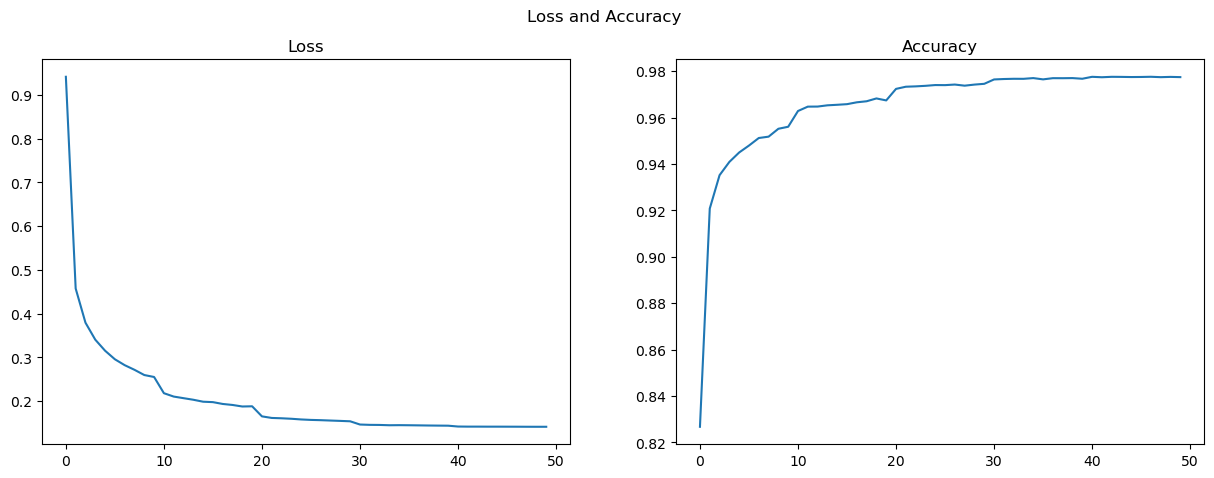

In [437]:
import matplotlib.pyplot as plt

#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()



## 2. Second Neural Architecture

In this one there are few updates:

- Its builded as 4 hidden layer as their inputs 128,56,18,18

- Activation function as 'sigmoid' 
- Dropout applied as 0.15
- Epoch applied as 100 times 
- Mini batch size as 128 
- Learning rate is initilized as 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [438]:
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,56,16,16], output_size=10, activation_function='sigmoid',dropout=0.4)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (56, 128), Biases shape: (56, 1)
Weights in layer : 2, Weights shape: (16, 56), Biases shape: (16, 1)
Weights in layer : 3, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 4, Weights shape: (10, 16), Biases shape: (10, 1)


In [439]:
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=100, batch_size=128,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :1.0


In  epoch  0 loss  is : 3.26307 and accuracy is: 0.10772
In  epoch  1 loss  is : 3.24987 and accuracy is: 0.11153
In  epoch  2 loss  is : 3.22144 and accuracy is: 0.13048
In  epoch  3 loss  is : 3.01254 and accuracy is: 0.19055
In  epoch  4 loss  is : 2.83508 and accuracy is: 0.23300
In  epoch  5 loss  is : 2.70097 and accuracy is: 0.27732
In  epoch  6 loss  is : 2.53414 and accuracy is: 0.33362
In  epoch  7 loss  is : 2.39640 and accuracy is: 0.37707
In  epoch  8 loss  is : 2.30263 and accuracy is: 0.40983
In  epoch  9 loss  is : 2.23170 and accuracy is: 0.42687
The learning rate at epoch 10 is :0.9090909090909091
In  epoch  10 loss  is : 2.16762 and accuracy is: 0.44273
In  epoch  11 loss  is : 2.12167 and accuracy is: 0.45072
In  epoch  12 loss  is : 2.09033 and accuracy is: 0.46047
In  epoch  13 loss  is : 2.05716 and accuracy is: 0.47013
In  epoch  14 loss  is : 2.02860 and accuracy is: 0.47715
In  epoch  15 loss  is : 1.99571 and accuracy is: 0.48918
In  epoch  16 loss  is : 1.97

In [440]:
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


Test Loss: 1.4918280290814516, Test Accuracy: 0.6906


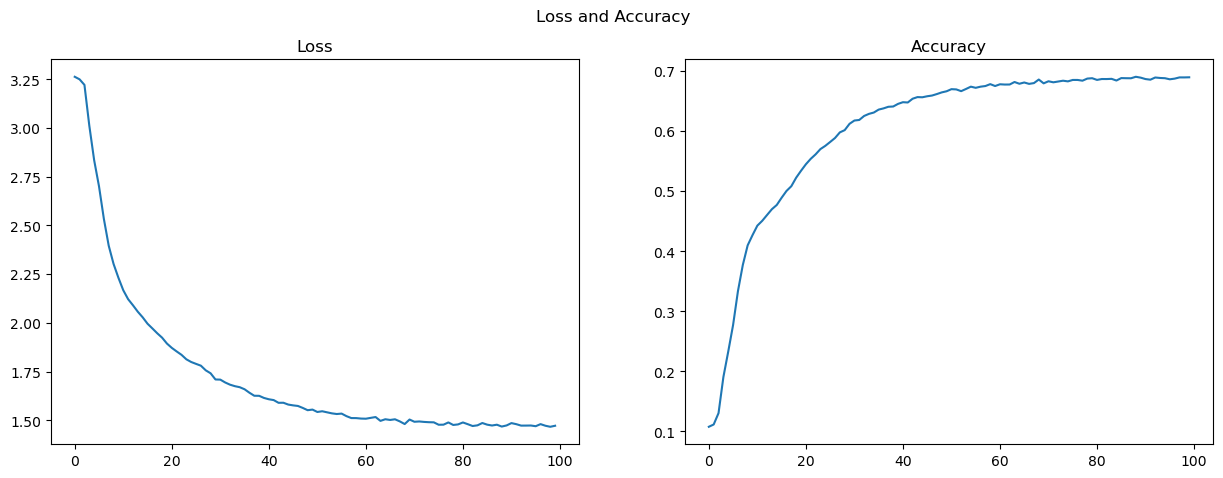

In [441]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()


## 3.Third Neural Network Architecture

- Its builded as 4 hidden layer as their inputs 128,56,18,18

- Activation function as 'ReLu' 
- Dropout applied as 0.4
- Epoch applied as 20 times
- SGD optimizer applied 
- Mini batch size as 56 
- Learning rate is initilized as 1 
- decay rate is 0.5 to decrease learning rate in steps in 20 (decay_step)



In [442]:
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,56,16,16], output_size=10, activation_function='relu',dropout=0.4)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (56, 128), Biases shape: (56, 1)
Weights in layer : 2, Weights shape: (16, 56), Biases shape: (16, 1)
Weights in layer : 3, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 4, Weights shape: (10, 16), Biases shape: (10, 1)


In [443]:
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=20, batch_size=1,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 3.04498 and accuracy is: 0.24422
In  epoch  1 loss  is : 3.06261 and accuracy is: 0.23052


In [ ]:
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

Test Loss: 24.727998430647027, Test Accuracy: 0.0914


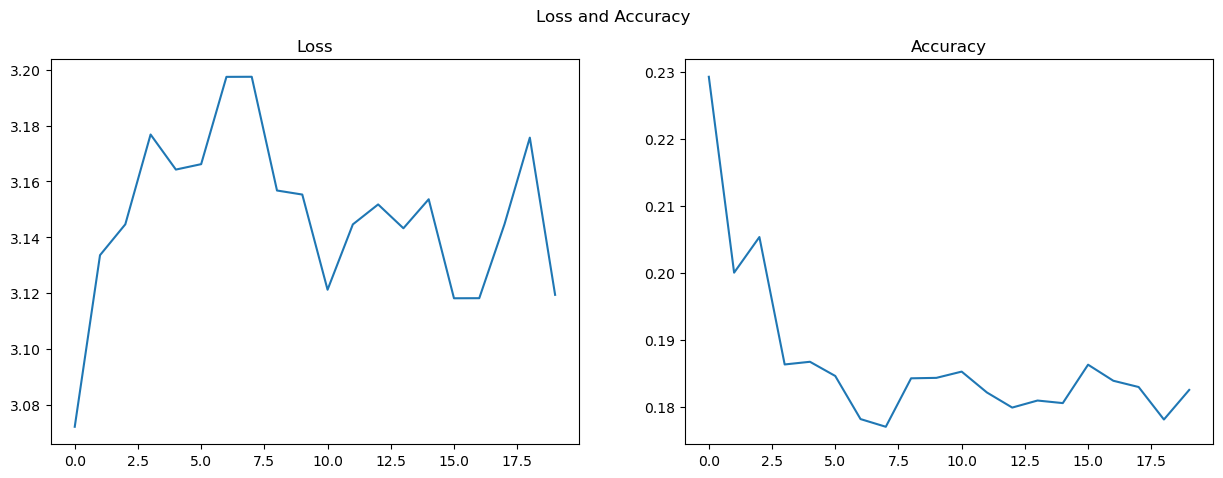

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()
